In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import librosa
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [3]:
AUDIO_PATH = "/content/drive/MyDrive/Animals sounds/Animal-SDataset"

MAX_LEN = 40
SAMPLE_RATE = 22050
N_MFCC = 13

def extract_features(file_path):
    y, sr = librosa.load(file_path, sr=SAMPLE_RATE)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=N_MFCC).T

    if mfcc.shape[0] < MAX_LEN:
        pad_width = MAX_LEN - mfcc.shape[0]
        mfcc = np.pad(mfcc, ((0, pad_width), (0, 0)), mode='constant')
    else:
        mfcc = mfcc[:MAX_LEN]
    return mfcc


In [4]:
X, y = [], []

# Loop through folders and extract features
for label in os.listdir(AUDIO_PATH):
    folder = os.path.join(AUDIO_PATH, label)
    if os.path.isdir(folder):
        for file in os.listdir(folder):
            if file.endswith('.wav'):
                file_path = os.path.join(folder, file)
                try:
                    mfcc = extract_features(file_path)
                    X.append(mfcc)
                    y.append(label)
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")

X = np.array(X)
y = np.array(y)

# Encode class labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded = tf.keras.utils.to_categorical(y_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

print(f"Data loaded. Shape: {X.shape}, Labels: {le.classes_}")


Data loaded. Shape: (865, 40, 13), Labels: ['Bird' 'Cat' 'Chicken' 'Cow' 'Dog' 'Donkey' 'Frog' 'Lion' 'Monkey'
 'Sheep']


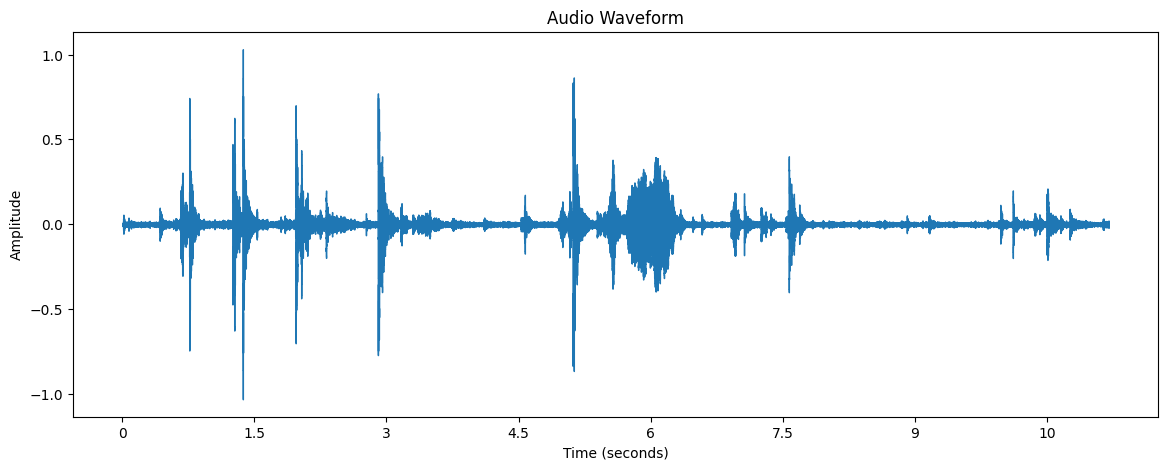

In [7]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
audio_file_path = "/content/drive/MyDrive/Animals sounds/Animal-SDataset/Cat/cat_1.wav"
y, sr = librosa.load(audio_file_path)

# Plot the audio waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
plt.title("Audio Waveform")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


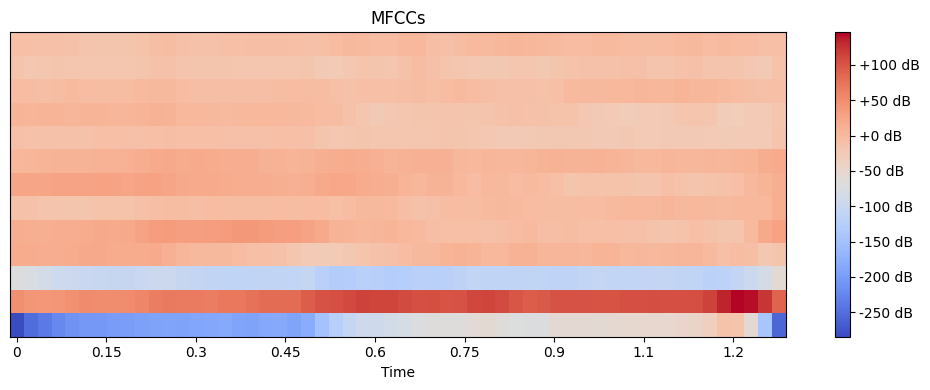

In [8]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

audio_file_path = "/content/drive/MyDrive/Animals sounds/Animal-SDataset/Cow/inek_10.wav"
y, sr = librosa.load(audio_file_path)

# Extract MFCCs
mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# Plot the MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCCs')
plt.tight_layout()
plt.show()


In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(MAX_LEN, N_MFCC)),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(y_encoded.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 9s 73ms/step - accuracy: 0.4018 - loss: 1.9406 - val_accuracy: 0.5954 - val_loss: 1.3077
Epoch 2/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.6142 - loss: 1.2103 - val_accuracy: 0.6532 - val_loss: 1.0922
Epoch 3/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.6816 - loss: 0.9806 - val_accuracy: 0.6474 - val_loss: 1.0639
Epoch 4/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.7051 - loss: 0.8546 - val_accuracy: 0.6821 - val_loss: 0.9526
Epoch 5/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.7624 - loss: 0.7156 - val_accuracy: 0.6879 - val_loss: 0.9166
Epoch 6/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.7936 - loss: 0.6182 - val_accuracy: 0.6647 - val_loss: 1.0413
Epoch 7/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - accuracy: 0.7853 - loss: 0.6295 - val_accuracy: 0.6936 - val_loss: 0.8762
Epoch 8/30
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.8237 - loss: 0.5272 - val_accuracy: 0.7457 - v

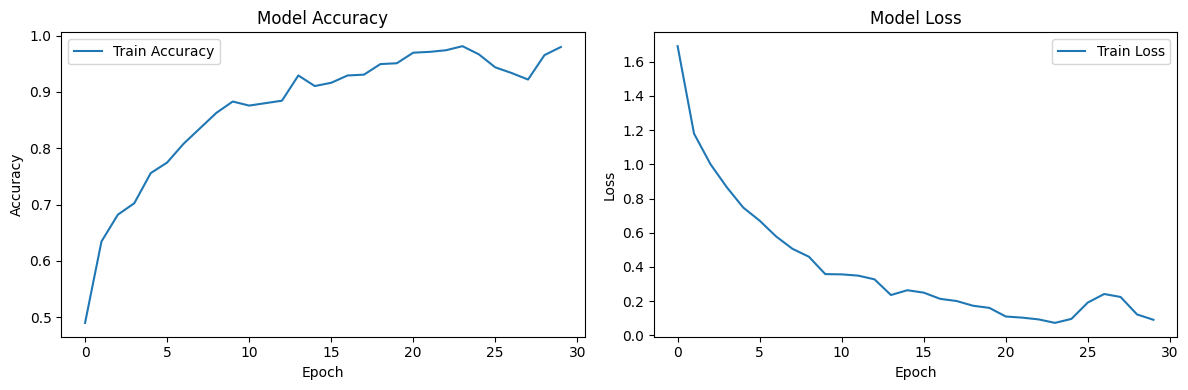

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()


In [11]:
import librosa
import numpy as np

def extract_features(file_path):
    try:
        audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
        mfccs = mfccs.T
        mfccs = mfccs[:40]
        if mfccs.shape[0] < 40:
            pad_width = 40 - mfccs.shape[0]
            mfccs = np.pad(mfccs, ((0, pad_width), (0, 0)), mode='constant')
        return mfccs
    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None


In [12]:
!pip install librosa
!pip install resampy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 27.7 MB/s eta 0:00:00


In [13]:
!pip install resampy


In [14]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 40, 64)         │        19,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 173,408 (677.38 KB)

 Trainable params: 57,802 (225.79 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 115,606 (451.59 KB)

In [15]:
import os

folder = r"/content/drive/MyDrive/Animals sounds/Animal-SDataset"
print(os.listdir(folder))

['Donkey', 'Monkey', 'Dog', 'Chicken', 'Bird', 'Sheep', 'Cow', 'Cat', 'Frog', 'Lion']


In [16]:
from sklearn.metrics import classification_report
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert true labels to class labels

# Get unique classes from predictions and true labels
unique_classes = np.unique(np.concatenate((y_pred_classes, y_true_classes)))

# Filter target names to match unique classes
target_names = [le.classes_[i] for i in unique_classes]

# Generate classification report with filtered target names
report = classification_report(y_true_classes, y_pred_classes, target_names=target_names)
print(report)


6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step
              precision    recall  f1-score   support

        Bird       1.00      0.88      0.94        43
         Cat       0.78      0.82      0.80        44
     Chicken       0.40      0.40      0.40         5
         Cow       0.67      0.71      0.69        14
         Dog       0.79      0.76      0.78        34
      Donkey       1.00      0.33      0.50         3
        Frog       0.58      0.78      0.67         9
        Lion       0.60      0.90      0.72        10
      Monkey       0.50      0.17      0.25         6
       Sheep       0.83      1.00      0.91         5

    accuracy                           0.78       173
   macro avg       0.72      0.68      0.66       173
weighted avg       0.79      0.78      0.78       173



6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


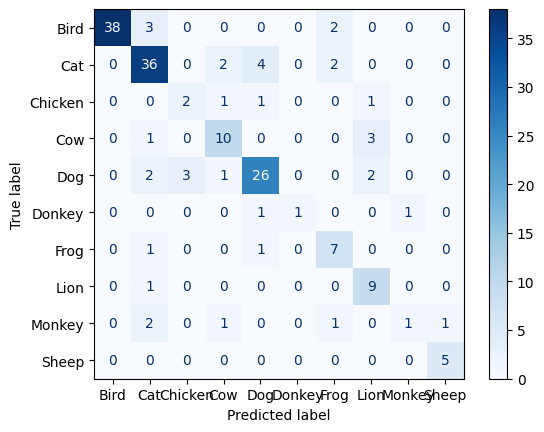

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert true labels to class labels

# Get unique classes from predictions and true labels
unique_classes = np.unique(np.concatenate((y_pred_classes, y_true_classes)))

# Filter target names to match unique classes
target_names = [le.classes_[i] for i in unique_classes]

cm = confusion_matrix(y_true_classes, y_pred_classes)

# Use target_names as display_labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues)
plt.show()

In [18]:
!pip install librosa resampy numpy

In [19]:
!pip install librosa resampy numpy scikit-learn

In [20]:
import librosa
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import load_model
from google.colab import files
import os

In [21]:
def extract_features(file_path):
    try:
        audio, sample_rate = librosa.load(file_path, sr=22050, duration=4.0)
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=13)
        if mfccs.shape[1] < 40:
            pad_width = 40 - mfccs.shape[1]
            mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfccs = mfccs[:, :40]
        return mfccs.T
    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None

In [25]:
# Step 5: Prediction function
def predict_voice(audio_file_path):
    mfccs = extract_features(audio_file_path)
    if mfccs is not None:
        mfccs = np.expand_dims(mfccs, axis=0)  # Shape: (1, 40, 13)
        prediction = model.predict(mfccs)
        predicted_class = np.argmax(prediction)
        predicted_label = le.inverse_transform([predicted_class])[0]
        return predicted_label
    else:
        return "Error extracting features."

Saving inek_1.wav to inek_1.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Predicted voice for inek_1.wav: Cow


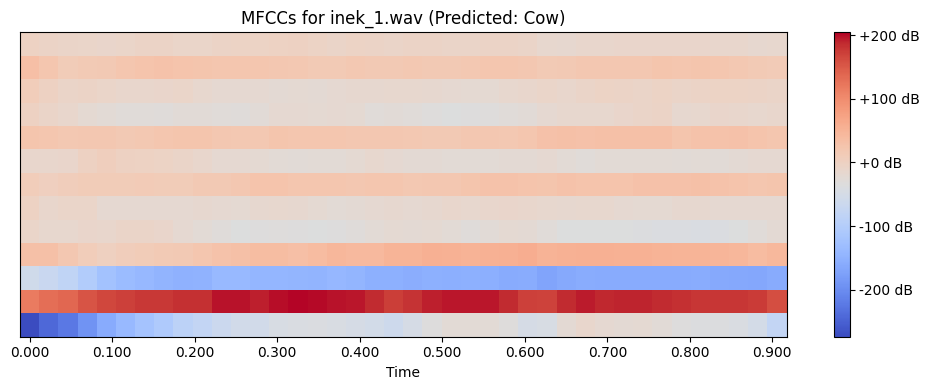

In [26]:

import IPython.display as ipd
uploaded = files.upload()

for fn in uploaded.keys():
    audio_file_path = fn
    predicted_voice = predict_voice(audio_file_path)
    print(f"Predicted voice for {audio_file_path}: {predicted_voice}")

    mfccs = extract_features(audio_file_path)

    if mfccs is not None:
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfccs.T, sr=SAMPLE_RATE, x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'MFCCs for {audio_file_path} (Predicted: {predicted_voice})')
        plt.tight_layout()
        plt.show()

ipd.Audio(audio_file_path)


Saving tavuk_1.wav to tavuk_1.wav
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Predicted voice for tavuk_1.wav: Chicken


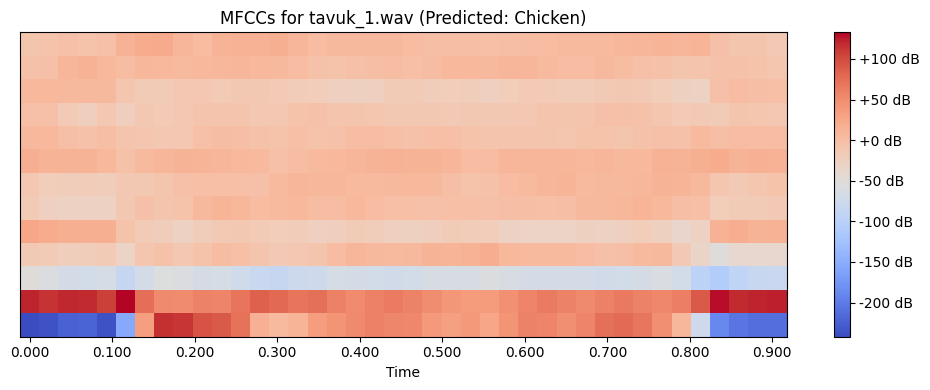

In [27]:
import IPython.display as ipd
uploaded = files.upload()

for fn in uploaded.keys():
    audio_file_path = fn
    predicted_voice = predict_voice(audio_file_path)
    print(f"Predicted voice for {audio_file_path}: {predicted_voice}")

    mfccs = extract_features(audio_file_path)

    if mfccs is not None:
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(mfccs.T, sr=SAMPLE_RATE, x_axis='time')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'MFCCs for {audio_file_path} (Predicted: {predicted_voice})')
        plt.tight_layout()
        plt.show()

ipd.Audio(audio_file_path)
